In [1]:
import matplotlib.patches as patches
from matplotlib.path import Path
import re
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})

In [2]:
def make_parallel_plot(df) -> matplotlib.figure.Figure:
    ynames = df.columns
    ys = df[ynames].values
    target = df[ynames[-1]].to_numpy()  # Target values

    ymaxs = ys.max(axis=0)
    ymins = ys.min(axis=0)
    # ymins = np.zeros_like(ymaxs)
    ymins[: -1] = np.zeros_like(ymaxs)[: -1]

    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05

    # reverse axis 1 to have less crossings
    # ymaxs[1], ymins[1] = ymins[1], ymaxs[1]
    # reverse loss axes to highlight that lower is better
    ymaxs[-1], ymins[-1] = ymins[-1], ymaxs[-1]
    ymaxs[-2], ymins[-2] = ymins[-2], ymaxs[-2]

    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    fig, host = plt.subplots(figsize=(20, 8))

    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    # host.set_title(
    #     'Parallel Coordinates Plot — Imitation Learning',
    #     fontsize=18,
    #     pad=12,
    # )

    cmap = sns.color_palette("plasma_r", as_cmap=True)
    norm = plt.Normalize(vmin=ymaxs[-1], vmax=ymins[-1])

    legend_handles = [None for _ in np.unique(target)]
    for j in range(ys.shape[0]):
        # create bezier curves
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                        np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(
            path,
            facecolor='none',
            lw=1,
            alpha=0.7,
            edgecolor=cmap(norm(target[j])),
        )
        # legend_handles[target[j]] = patch
        host.add_patch(patch)

    # Uncomment the following lines if you want to add a legend
    # host.legend(legend_handles, np.unique(target),
    #             loc='lower center', bbox_to_anchor=(0.5, -0.18),
    #             ncol=len(np.unique(target)), fancybox=True, shadow=True)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax, pad=-0)
    # cbar.set_ticks([])
    # cbar.set_ticklabels([])
    # cbar.outline.set_visible(False)
    cbar.ax.invert_yaxis()

    ax.set_yticks([])
    ax.set_yticklabels([])

    plt.tight_layout()
    plt.show()
    
    return fig

In [3]:
df = pd.read_csv("IL_data/wandb_export_2025-04-02T09_28_49.718+02_00.csv", index_col=0)\
    .fillna(0)\
    .rename(columns=lambda x: re.sub('imitation/', '', x))
df.head()

,n_neurons_layer_0,n_neurons_layer_1,n_neurons_layer_2,n_neurons_layer_3,n_neurons_layer_4,n_hidden_layers,lr_imitation,train_loss,validation_loss
Name,,,,,,,,,
Imitation__ce05dd84-8c7d-4381-b4d0-8d3732b144fe,1719,353,180.0,266.0,74.0,5,0.000225,0.002402,0.086578
Imitation__beaa91d4-289b-4538-89e2-eb8ccb7447ba,322,71,1812.0,439.0,339.0,5,0.000091,0.013396,0.087875
Imitation__0dac90a4-74a0-4d10-88a0-6524ae82e7b5,86,972,0.0,0.0,0.0,2,0.001241,0.016931,0.089350
Imitation__04a777bd-802b-4999-8bdc-2409d2998c88,516,66,0.0,0.0,0.0,2,0.000130,0.037112,0.089910
Imitation__6f22196f-f995-4520-b12c-08cf7be0825b,161,411,1657.0,816.0,0.0,4,0.000187,0.002399,0.090618


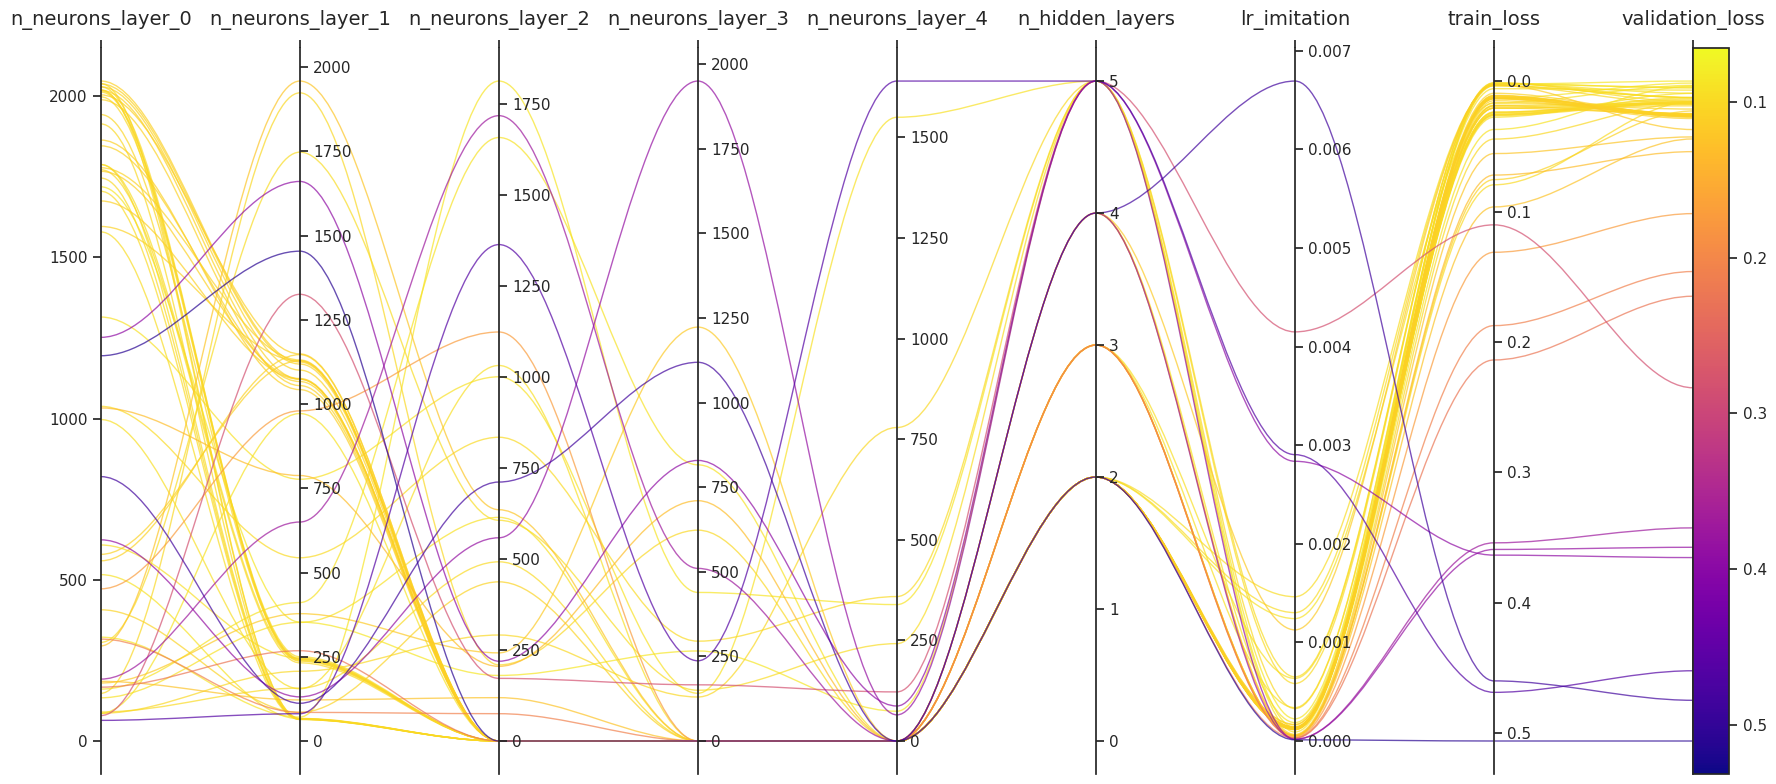

In [4]:
make_parallel_plot(df).savefig("parallel_coordinates_IL.png", dpi=200)

Text(0.5, 0, 'Correlation Coefficient')

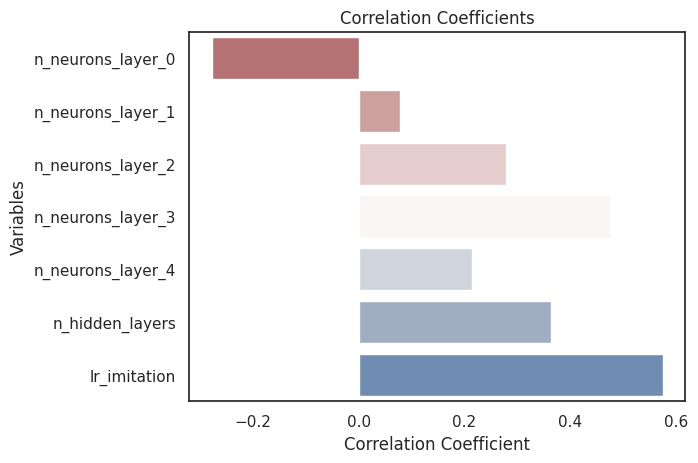

In [47]:
correlations = df.corr(numeric_only=True)["validation_loss"].drop(["validation_loss", "train_loss"]).to_frame().transpose()
sns.barplot(
    data=correlations,
    orient="h",
    palette="vlag_r",
)

plt.title('Correlation Coefficients')
plt.ylabel('Variables')
plt.xlabel('Correlation Coefficient')

In [32]:
correlations

,n_neurons_layer_0,n_neurons_layer_1,n_neurons_layer_2,n_neurons_layer_3,n_neurons_layer_4,n_hidden_layers,lr_imitation
validation_loss,-0.277071,0.077285,0.27768,0.474264,0.21408,0.364099,0.574035
